In [124]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
from data_processing import load_LOBs_data_by_date, load_Tapes_data_by_date, load_all_Tapes
from tools import getDates
import config

def load_data():
    # dates=getDates(config.LOBs_directory_path)
    dates=['2025-01-02','2025-01-03']
    lob_df = pd.DataFrame()
    tapes_df = pd.DataFrame()
    for date in dates:
        # lob_date_df=pd.read_hdf('R_LOBs.h5',date)
        # lob_df=pd.concat([lob_df,lob_date_df])
        # print(lob_df.describe())
        tapes_date_df=pd.read_hdf('R_tapes.h5', key=date)
        tapes_df=pd.concat([tapes_df,tapes_date_df])
        # print(tapes_df.describe())
        
    return lob_df,tapes_df

lob_df, tapes_df = load_data()
# ask_df=lob_df[lob_df['type']=='Ask']
# bid_df=lob_df[lob_df['type']=='Bid']
data=tapes_df
# data=pd.concat([tapes_df,lob_df])
data.set_index('timestamp',inplace=True)
data=data.resample('15H').last()
data.dropna(inplace=True)
data.reset_index(drop=False,inplace=True)
# data.head(15)
# ask_df




,timestamp,type,orders
0,2025-01-02 00:00:02,Ask,"[{'price': 797.0, 'quantity': 1.0}]"
1,2025-01-02 00:00:03,Ask,"[{'price': 297.0, 'quantity': 5.0}, {'price': ..."
2,2025-01-02 00:00:04,Ask,"[{'price': 291.0, 'quantity': 1.0}, {'price': ..."
3,2025-01-02 00:00:05,Ask,"[{'price': 286.0, 'quantity': 1.0}, {'price': ..."
4,2025-01-02 00:00:06,Ask,"[{'price': 283.0, 'quantity': 6.0}, {'price': ..."
...,...,...,...
30590,2025-01-03 08:29:56,Ask,"[{'price': 300.0, 'quantity': 4.0}, {'price': ..."
30591,2025-01-03 08:29:57,Ask,"[{'price': 298.0, 'quantity': 4.0}, {'price': ..."
30592,2025-01-03 08:29:58,Ask,"[{'price': 295.0, 'quantity': 4.0}, {'price': ..."
30593,2025-01-03 08:29:59,Ask,"[{'price': 317.0, 'quantity': 3.0}, {'price': ..."


In [110]:
# Adding indicators
data['RSI'] = ta.rsi(data['close'], length=15)
data['EMAF'] = ta.ema(data['close'], length=20)
data['EMAM'] = ta.ema(data['close'], length=100)
data['EMAS'] = ta.ema(data['close'], length=150)

# Computing target column as the difference shifted by one period
data['Target'] = data['close'] - data['open']
data['Target'] = data['Target'].shift(-1)

# Using vectorized operation to create TargetClass
data['TargetClass'] = (data['Target'] > 0).astype(int)

# Adjusting for next close, assuming 'Adj Close' exists in your data
data['TargetNextClose'] = data['close'].shift(-1)

# Dropping NA values and resetting the index
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)  # Consider whether you want to drop the old index

# Dropping unnecessary columns
data.drop(['timestamp','quantity','price'], axis=1, inplace=True)

# Now your data should be ready to use


In [111]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,open,high,low,close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,279.0,288.0,269.0,269.0,46.052859,276.200640,268.754565,264.540000,10.0,1,279.0
1,269.0,289.0,269.0,279.0,52.110057,276.467246,268.957445,264.731523,2.0,1,281.0
2,279.0,290.0,279.0,281.0,53.235220,276.898937,269.195911,264.947000,9.0,1,290.0
3,281.0,291.0,279.0,290.0,57.993631,278.146657,269.607873,265.278828,-6.0,0,283.0
4,289.0,291.0,278.0,283.0,53.460533,278.608880,269.873064,265.513545,8.0,1,291.0
5,283.0,292.0,273.0,291.0,57.525852,279.788987,270.291419,265.851114,-5.0,0,286.0
6,291.0,292.0,276.0,286.0,54.346850,280.380512,270.602480,266.117987,-14.0,0,277.0
7,291.0,291.0,277.0,277.0,49.112578,280.058558,270.729164,266.262119,12.0,1,289.0
8,277.0,293.0,273.0,289.0,55.267306,280.910124,271.090962,266.563283,3.0,1,292.0
9,289.0,293.0,283.0,292.0,56.671025,281.966303,271.505003,266.900193,-6.0,0,286.0


In [112]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.2173913  0.06451613 0.         ... 0.72972973 1.         0.14285714]
 [0.         0.09677419 0.         ... 0.51351351 1.         0.19047619]
 [0.2173913  0.12903226 0.27027027 ... 0.7027027  1.         0.4047619 ]
 ...
 [0.43478261 0.38709677 0.2972973  ... 1.         1.         0.61904762]
 [0.2173913  0.41935484 0.27027027 ... 0.43243243 0.         0.5952381 ]
 [0.65217391 0.41935484 0.27027027 ... 0.43243243 0.         0.42857143]]


In [113]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,3])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

870
[[[0.2173913  0.06451613 0.         ... 0.         0.         0.        ]
  [0.         0.09677419 0.         ... 0.00856408 0.00588366 0.00516695]
  [0.2173913  0.12903226 0.27027027 ... 0.02243112 0.01279936 0.01098012]
  ...
  [0.5        0.19354839 0.16216216 ... 0.28727569 0.20401342 0.17173339]
  [0.34782609 0.09677419 0.10810811 ... 0.25012439 0.20241159 0.17248177]
  [0.30434783 0.22580645 0.16216216 ... 0.26240077 0.20945554 0.17858013]]

 [[0.         0.09677419 0.         ... 0.00856408 0.00588366 0.00516695]
  [0.2173913  0.12903226 0.27027027 ... 0.02243112 0.01279936 0.01098012]
  [0.26086957 0.16129032 0.27027027 ... 0.06251117 0.02474656 0.01993223]
  ...
  [0.34782609 0.09677419 0.10810811 ... 0.25012439 0.20241159 0.17248177]
  [0.30434783 0.22580645 0.16216216 ... 0.26240077 0.20945554 0.17858013]
  [0.41304348 0.22580645 0.2972973  ... 0.27962657 0.21750856 0.18531238]]

 [[0.2173913  0.12903226 0.27027027 ... 0.02243112 0.01279936 0.01098012]
  [0.26086957 0.16

In [114]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

672
(672, 30, 8)
(168, 30, 8)
(672, 1)
(168, 1)
[[0.45652174]
 [0.41304348]
 [0.2826087 ]
 [0.52173913]
 [0.32608696]
 [0.43478261]
 [0.41304348]
 [0.45652174]
 [0.43478261]
 [0.39130435]
 [0.58695652]
 [0.34782609]
 [0.43478261]
 [0.2826087 ]
 [0.30434783]
 [0.43478261]
 [0.5       ]
 [0.32608696]
 [0.54347826]
 [0.32608696]
 [0.39130435]
 [0.17391304]
 [0.30434783]
 [0.43478261]
 [0.52173913]
 [0.58695652]
 [0.52173913]
 [0.56521739]
 [0.52173913]
 [0.39130435]
 [0.34782609]
 [0.41304348]
 [0.58695652]
 [0.30434783]
 [0.56521739]
 [0.63043478]
 [0.39130435]
 [0.30434783]
 [0.45652174]
 [0.43478261]
 [0.36956522]
 [0.52173913]
 [0.65217391]
 [0.67391304]
 [0.65217391]
 [0.5       ]
 [0.56521739]
 [0.5       ]
 [0.54347826]
 [0.54347826]
 [0.5       ]
 [0.60869565]
 [0.43478261]
 [0.54347826]
 [0.63043478]
 [0.65217391]
 [0.58695652]
 [0.47826087]
 [0.45652174]
 [0.58695652]
 [0.52173913]
 [0.54347826]
 [0.63043478]
 [0.26086957]
 [0.45652174]
 [0.47826087]
 [0.54347826]
 [0.54347826]


In [115]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0332 - val_loss: 0.0108
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0112 - val_loss: 0.0111
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0114 - val_loss: 0.0106
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0116 - val_loss: 0.0122
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0101 - val_loss: 0.0107
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0111 - val_loss: 0.0112
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0117 - val_loss: 0.0179
Epoch 8/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0117 - val_loss: 0.0153
Epoch 9/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0129 - val_loss: 0.0108
Epoch 10/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0101 - val_loss: 0.0151
Epoch 11/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0111 - val_loss: 0.0110
Epoch 12/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[0.8354902] [0.60869565]
[0.7951203] [0.89130435]
[0.8318986] [0.65217391]
[0.83730954] [0.91304348]
[0.8367327] [0.82608696]
[0.83857846] [0.7826087]
[0.8148296] [0.89130435]
[0.8303312] [0.67391304]
[0.8204414] [0.91304348]
[0.8140938] [0.89130435]


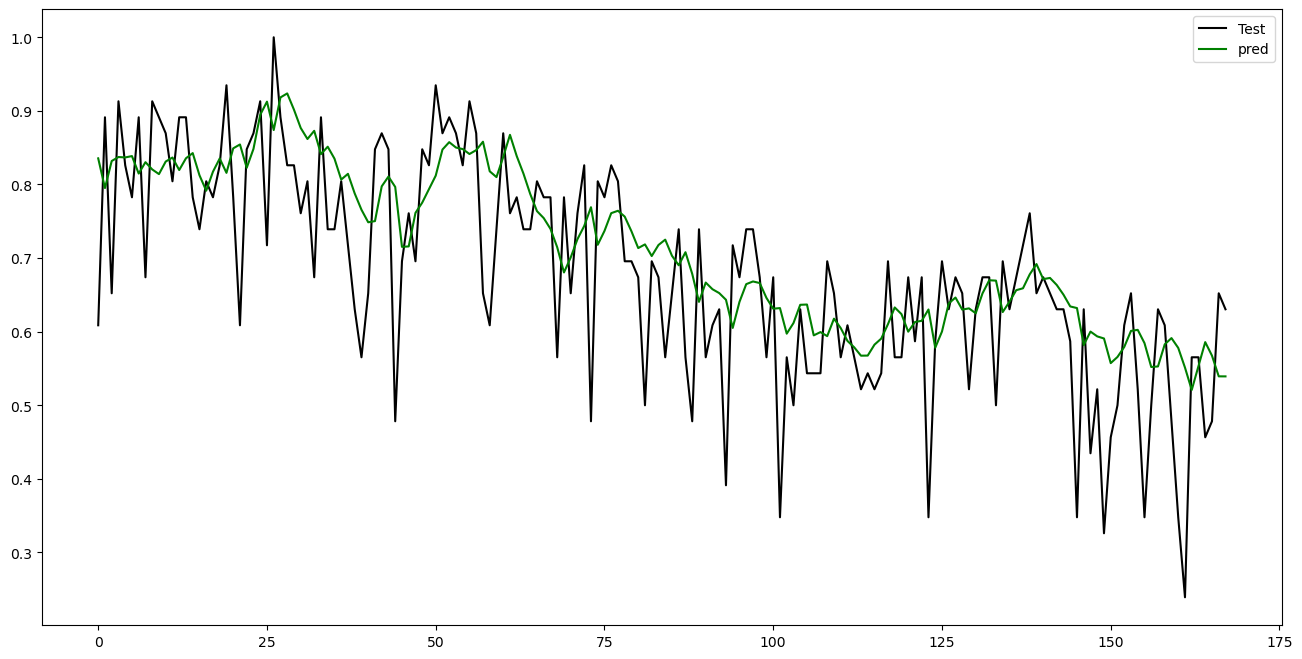

In [116]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [117]:
print(len(y_pred))
print(len(y_test))
print(len(y_train))


168
168
672
